In [36]:
def remove_middle(lst):
    if not lst:  # Check if list is empty
        return lst
    mid_index = len(lst) // 2  # Find middle index
    return lst[:mid_index] + lst[mid_index+1:]  # Remove middle element

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import wasserstein_distance

def compute_and_plot_wasserstein(dq_list, q_values):
   
    # print("dq_list type:", type(dq_list))
    # print("dq_list length:", len(dq_list))
    # for i, dq in enumerate(dq_list):
    #     print(f"Dq[{i}] type:", type(dq))
    #     print(f"Dq[{i}] length:", len(dq) if hasattr(dq, '__len__') else "Not iterable")


    num_distributions = len(dq_list)
    wasserstein_matrix = np.zeros((num_distributions, num_distributions))
    for i in range(num_distributions):
        for j in range(num_distributions):
            if len(dq_list[i]) == 0 or len(dq_list[j]) == 0:
                print(f"Skipping empty distribution at ({i}, {j})")
                wasserstein_matrix[i, j] = np.nan  # Or assign a default value
            else:
                wasserstein_matrix[i, j] = wasserstein_distance(dq_list[i], dq_list[j])

    df_wasserstein = pd.DataFrame(
        wasserstein_matrix, 
        columns=[f"D{i}" for i in range(num_distributions)], 
        index=[f"D{i}" for i in range(num_distributions)]
    )

    # plt.figure(figsize=(10, 6))
    # for i, dq in enumerate(dq_list):
    #     plt.plot(q_values, dq, label=f"D{i}")
    # plt.xlabel("q values")
    # plt.ylabel("Dq values")
    # plt.title("Dq Distributions over q")
    # plt.legend()
    # plt.show()

    # tools.display_dataframe_to_user(name="Wasserstein Distance Matrix", dataframe=df_wasserstein)


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.stats import wasserstein_distance

def plot_avg_spectrum(output_dir, channel, session_day, mode, show_first_and_last):
    # Folder path
    folder_path = os.path.join(output_dir, f"{channel}-{session_day}-{mode}")
    avg_results_file = os.path.join(folder_path, 'Avg_Dq_Results.mat')
    
    # Load the data
    data = scipy.io.loadmat(avg_results_file)
    avg_results = data['avg_results'][0]
    
    q_values = np.arange(-20, 21,1)
    # Updated colors
    colors = ['#FF1F5A', '#FFD615', '#1E2A78']
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_facecolor('white')
    ax.set_xlabel('q', fontsize=14, fontname='Arial')
    ax.set_ylabel('D(q)', fontsize=14, fontname='Arial')

    # Add title above top border, not in bold
    plt.text(0.5, 1.0, channel, fontsize=14, fontweight='normal', fontname='Arial',
             horizontalalignment='center', verticalalignment='bottom', transform=ax.transAxes)
    
    indices_to_plot = [0, len(avg_results) - 1] if show_first_and_last else range(len(avg_results)-1)
    markers = ['o', 's', 'd', '^', 'v', 'p', 'h', 'x', '+']
    
    all_hq_values = []
    all_Dq_values = []
    fatigue_levels = []
    Dq_list = []
    
    for i in indices_to_plot:
        fatigue_level = avg_results[i]['fatigue_level'][0][0]
        Dq_avg = avg_results[i]['Dq_avg'][0]
        hq_avg = avg_results[i]['hq_avg'][0]
        print("Delta dq", Dq_avg[0] - Dq_avg[-1])
        print("Delta hq", hq_avg[0] - hq_avg[-1])
        all_hq_values.extend(hq_avg)
        all_Dq_values.extend([Dq_avg])
        fatigue_levels.append(fatigue_level)
        Dq_list.append(Dq_avg)
        
        color = colors[i % len(colors)]
        marker = markers[i % len(markers)]
        # print(len(Dq_avg), len(q_values))
        ax.plot(q_values[], Dq_avg[20:30], linestyle='-', marker=marker, linewidth=1.9,
                markersize=5, markerfacecolor=color, markeredgecolor='black', 
                markeredgewidth=0.8, color=color, alpha=0.7,
                label=f'Level {fatigue_level}')
    
    # x_min, x_max = min(all_hq_values), max(all_hq_values)
    # y_min, y_max = min(all_Dq_values), max(all_Dq_values)

    # print(all_Dq_values)
    compute_and_plot_wasserstein(all_Dq_values,q_values)
    ax.legend(loc='upper right', fontsize=10, frameon=False, bbox_to_anchor=(0.99, 0.99))
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.xaxis.set_tick_params(top=False, labelsize=12)
    ax.yaxis.set_tick_params(right=False, labelsize=12)
    
    output_plot_file = os.path.join(folder_path, f"{channel}_{session_day}_{mode}-Avg_Dq_vs_hq.png")
    plt.savefig(output_plot_file, dpi=600, bbox_inches='tight')
    print(f'High-quality plot saved to: {output_plot_file}')
    plt.show()
    
    # Compute Wasserstein distances between different fatigue levels
    wasserstein_results = {}
    for i in range(len(Dq_list)):
        for j in range(i + 1, len(Dq_list)):
            wd = wasserstein_distance(Dq_list[i], Dq_list[j])
            wasserstein_results[(fatigue_levels[i], fatigue_levels[j])] = wd
    
    # Print results
    print("Wasserstein Distances between Fatigue Levels:")
    for (level1, level2), distance in wasserstein_results.items():
        print(f"Level {level1} vs Level {level2}: {distance:.4f}")


Delta dq -0.20308257918615258
Delta hq 1.4358426808096632
Delta dq -0.1925637110953277
Delta hq 1.3872339257659085
Delta dq -0.1889532539107725
Delta hq 1.3321349996079122
High-quality plot saved to: /Users/athenasaghi/Desktop/CognitiveFatigue/Dq_features/AF8-First-m/AF8_First_m-Avg_Dq_vs_hq.png


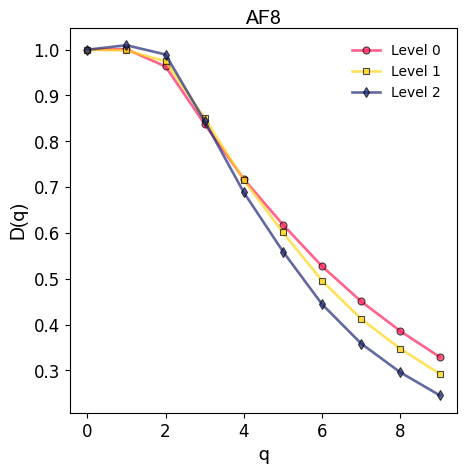

Wasserstein Distances between Fatigue Levels:
Level 0 vs Level 1: 0.0146
Level 0 vs Level 2: 0.0240
Level 1 vs Level 2: 0.0144


In [15]:



dataset_path = '/Users/athenasaghi/VSProjects/CognitiveFatigueDetection/CogFatigueData/CogBeacon'
output_dir = '/Users/athenasaghi/Desktop/CognitiveFatigue/Dq_features'
channel = 'AF8'
session_type = 'First'
mode = 'm'

plot_avg_spectrum(output_dir,channel, session_type,mode ,0)



In [ ]:


def emergence(dDq, a, q):
    return np.trapz(dDq * np.abs(np.gradient(a, q[1] - q[0], edge_order=2)), q)

emergence((Dq[i + 1] - Dq[i])[10:], A[i + 1][10:], q),

Delta dq 0.04547022319162157
Delta hq 0.8085593954274546
41 41
Delta dq 0.039031295545397776
Delta hq 0.6620697311407516
41 41
Delta dq 0.04841548903150788
Delta hq 0.7114454172608946
41 41
[array([ 0.00633129,  0.01582315,  0.02670891,  0.03914589,  0.05330552,
        0.06938946,  0.08766171,  0.10850322,  0.13249472,  0.16052065,
        0.19384349,  0.23399777,  0.28219952,  0.33783747,  0.39720892,
        0.45913609,  0.54007912,  0.68009783,  0.85137258,  0.90825068,
        1.        ,  0.98476264,  0.90871301,  0.72628224,  0.51999144,
        0.35451586,  0.23960075,  0.16341766,  0.11063775,  0.07247957,
        0.04424339,  0.02305631,  0.00699003, -0.00529251, -0.0147315 ,
       -0.02199801, -0.02758007, -0.03184001, -0.03505253, -0.0374299 ,
       -0.03913893]), array([-0.00231884,  0.00902226,  0.02198701,  0.03674932,  0.05349828,
        0.07245676,  0.0939158 ,  0.11828773,  0.14617289,  0.17840791,
        0.2159924 ,  0.25970126,  0.30931331,  0.36303531,  0.41852

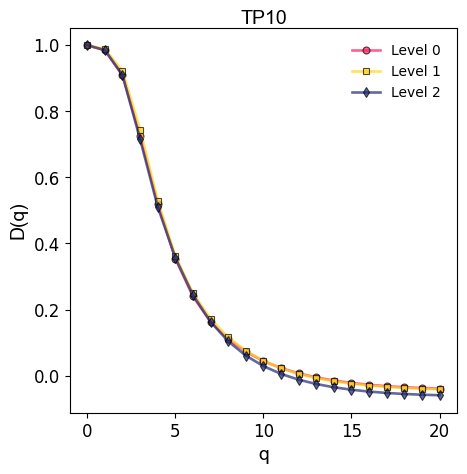

Wasserstein Distances between Fatigue Levels:
Level 0 vs Level 1: 0.0100
Level 0 vs Level 2: 0.0114
Level 1 vs Level 2: 0.0150


In [46]:



dataset_path = '/Users/athenasaghi/VSProjects/CognitiveFatigueDetection/CogFatigueData/CogBeacon'
output_dir = '/Users/athenasaghi/Desktop/CognitiveFatigue/Dq_features'
channel = 'TP10'
session_type = 'First'
mode = 'm'


plot_avg_spectrum(output_dir,channel, session_type,mode ,0)
